# Purpose

Students have the option of using Pandas and SQL to complete this project. A Phase 1 project done completely in pandas, completely in SQL, or a mixture of the two can all be considered a fine Phase 1 project. This notebook serves as a resource for setting up an SQL database for students who wish to use SQL in their Phase 1 project.

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [1]:
from src.make_db import create_movies_db

In [2]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

![movies.db schema](images/movies_db_schema.png)

In [3]:
import os
import sqlite3
import pandas as pd
# Open up a connection
conn = sqlite3.connect('data/movies.db')
# Initialize a cursor
cursor = conn.cursor()

In [4]:
budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz') #load data
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
budgets['domestic_gross'] = budgets['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float) #change to float to order by
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
budgets['production_budget'] = budgets['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [6]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [8]:
table_name_query = """SELECT * FROM tn_movie_budgets ORDER BY `production_budget`+0 DESC;"""

pd.read_sql(table_name_query, conn)

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...,...
5777,5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [9]:
budgets['end_gross'] = budgets['domestic_gross'] + budgets['worldwide_gross'] - budgets['production_budget'] 
budgets.head() # calculated end gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-1.574753e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09


In [10]:
budgets = budgets.sort_values(by='end_gross', ascending=False)
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
...,...,...,...,...,...,...,...
480,81,"Dec 31, 2019",Army of the Dead,90000000.0,0.0,0.000000e+00,-9.000000e+07
479,80,"Dec 13, 2017",Bright,90000000.0,0.0,0.000000e+00,-9.000000e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.038000e+08
194,95,"Dec 31, 2020",Moonfall,150000000.0,0.0,0.000000e+00,-1.500000e+08


In [14]:
type(budgets)

pandas.core.frame.DataFrame

In [15]:
stream_platform = pd.read_csv('data/MoviesOnStreamingPlatforms_updated.csv')
stream_platform

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [16]:
stream_platform = stream_platform.dropna(subset = ['Rotten Tomatoes'])
stream_platform

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0
16687,16687,16688,Kazaam,1996,7+,3.0,6%,0,0,0,1,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0
16705,16705,16706,Meet the Deedles,1998,7+,4.1,7%,0,0,0,1,0,Steve Boyum,"Comedy,Family",United States,English,93.0


In [17]:
stream_platform['Title']

0                             Inception
1                            The Matrix
2                Avengers: Infinity War
3                    Back to the Future
4        The Good, the Bad and the Ugly
                      ...              
16671            George of the Jungle 2
16677                     That Darn Cat
16687                            Kazaam
16705                  Meet the Deedles
16719                        Pocahontas
Name: Title, Length: 5158, dtype: object

In [18]:
stream_title = stream_platform['Title']

In [19]:
budgets['movie']

0                                    Avatar
5      Star Wars Ep. VII: The Force Awakens
42                                  Titanic
6                    Avengers: Infinity War
33                           Jurassic World
                       ...                 
480                        Army of the Dead
479                                  Bright
341             Men in Black: International
194                                Moonfall
2                              Dark Phoenix
Name: movie, Length: 5782, dtype: object

In [20]:
data_title = budgets['movie']

In [21]:
stream_platform[stream_platform['Title'].isin(data_title)]


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16552,16552,16553,Confessions of a Teenage Drama Queen,2004,7+,4.6,14%,0,0,0,1,0,Sara Sugarman,"Comedy,Family,Music,Romance","Germany,United States",English,89.0
16633,16633,16634,The Country Bears,2002,all,4.1,29%,0,0,0,1,0,Peter Hastings,"Comedy,Family,Music,Musical",United States,English,88.0
16643,16643,16644,Doug's 1st Movie,1999,all,5.0,26%,0,0,0,1,0,Maurice Joyce,"Animation,Adventure,Comedy,Drama,Family,Fantas...",United States,English,77.0
16705,16705,16706,Meet the Deedles,1998,7+,4.1,7%,0,0,0,1,0,Steve Boyum,"Comedy,Family",United States,English,93.0


In [22]:
streammoviedata = stream_platform[stream_platform['Title'].isin(data_title)]

In [23]:
streammovie_titles = streammoviedata['Title']
streammovie_titles

0                                   Inception
1                                  The Matrix
2                      Avengers: Infinity War
3                          Back to the Future
6                                 The Pianist
                         ...                 
16552    Confessions of a Teenage Drama Queen
16633                       The Country Bears
16643                        Doug's 1st Movie
16705                        Meet the Deedles
16719                              Pocahontas
Name: Title, Length: 988, dtype: object

In [24]:
stream_platform[~stream_platform['Title'].isin(data_title)]


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
11,11,12,3 Idiots,2009,13+,8.4,100%,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0
12,12,13,Pan's Labyrinth,2006,18+,8.2,95%,1,0,0,0,0,Guillermo del Toro,"Drama,Fantasy,War","Mexico,Spain",Spanish,118.0
18,18,19,The King's Speech,2010,18+,8.0,95%,1,0,0,0,0,Tom Hooper,"Biography,Drama,History","United Kingdom,United States,Australia",English,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,16637,16638,Inspector Gadget 2,2003,all,3.4,40%,0,0,0,1,0,Alex Zamm,"Action,Comedy,Crime,Family,Sci-Fi",United States,English,89.0
16657,16657,16658,A Kid in King Arthur's Court,1995,7+,4.7,5%,0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0


In [25]:
budgets[budgets['movie'].isin(streammovie_titles)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.916215e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.848318e+09
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.651102e+09
...,...,...,...,...,...,...,...
817,18,"Oct 27, 2000",Lucky Numbers,65000000.0,10014234.0,1.001423e+07,-4.497153e+07
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,2.391136e+07,-4.568228e+07
1206,7,"Nov 8, 2019",Arctic Dogs,50000000.0,0.0,0.000000e+00,-5.000000e+07
193,94,"Mar 11, 2011",Mars Needs Moms,150000000.0,21392758.0,3.954976e+07,-8.905748e+07


In [26]:
budgets[~budgets['movie'].isin(streammovie_titles)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.681730e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09
...,...,...,...,...,...,...,...
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000.0,4411102.0,7.094995e+06,-8.849390e+07
480,81,"Dec 31, 2019",Army of the Dead,90000000.0,0.0,0.000000e+00,-9.000000e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.038000e+08
194,95,"Dec 31, 2020",Moonfall,150000000.0,0.0,0.000000e+00,-1.500000e+08


In [27]:
df = budgets.loc[(budgets['domestic_gross'] > 0.0) & (budgets['worldwide_gross'] > 0.0)]
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000.0,6712451.0,1.036477e+07,-8.792278e+07
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000.0,4411102.0,7.094995e+06,-8.849390e+07
193,94,"Mar 11, 2011",Mars Needs Moms,150000000.0,21392758.0,3.954976e+07,-8.905748e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.038000e+08


In [28]:
nonstream_eg=df[~df['movie'].isin(streammovie_titles)]
nonstream_eg

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.681730e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09
...,...,...,...,...,...,...,...
607,8,"Sep 2, 2005",A Sound of Thunder,80000000.0,1900451.0,6.300451e+06,-7.179910e+07
352,53,"Apr 27, 2001",Town & Country,105000000.0,6712451.0,1.036477e+07,-8.792278e+07
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000.0,4411102.0,7.094995e+06,-8.849390e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.038000e+08


In [31]:
df_title = df['movie']

In [32]:
df_nonstream = stream_platform[~stream_platform['Title'].isin(df_title)]
df_nonstream 

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
11,11,12,3 Idiots,2009,13+,8.4,100%,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,"Hindi,English",170.0
12,12,13,Pan's Labyrinth,2006,18+,8.2,95%,1,0,0,0,0,Guillermo del Toro,"Drama,Fantasy,War","Mexico,Spain",Spanish,118.0
18,18,19,The King's Speech,2010,18+,8.0,95%,1,0,0,0,0,Tom Hooper,"Biography,Drama,History","United Kingdom,United States,Australia",English,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,16637,16638,Inspector Gadget 2,2003,all,3.4,40%,0,0,0,1,0,Alex Zamm,"Action,Comedy,Crime,Family,Sci-Fi",United States,English,89.0
16657,16657,16658,A Kid in King Arthur's Court,1995,7+,4.7,5%,0,0,0,1,0,Michael Gottlieb,"Adventure,Comedy,Family,Fantasy,Romance","United States,Hungary,United Kingdom",English,89.0
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17%,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13%,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0


In [33]:
df_noncount = df_nonstream.sort_values('Rotten Tomatoes', ascending = False).head(500)
df_noncount

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
262,262,263,20 Feet from Stardom,2013,13+,7.4,99%,1,0,0,0,0,Morgan Neville,"Documentary,Biography,Music",United States,"English,Spanish",91.0
3590,3590,3591,Apollo 11,2019,all,8.2,99%,0,1,0,0,0,Todd Douglas Miller,"Documentary,History",United States,English,93.0
3562,3562,3563,Parasite,2019,18+,8.6,99%,0,1,1,0,0,Bong Joon Ho,"Comedy,Drama,Thriller",South Korea,"Korean,English",132.0
4511,4511,4512,For Sama,2019,7+,8.5,99%,0,0,1,0,0,"Waad Al-Kateab,Edward Watts","Documentary,War","United Kingdom,Syria,United States","Arabic,English",100.0
4854,4854,4855,Rivers and Tides,2001,all,7.9,99%,0,0,1,0,0,Thomas Riedelsheimer,Documentary,"Germany,Finland,United Kingdom,Canada",English,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,571,572,Raiders!: The Story of the Greatest Fan Film E...,2015,NaN,6.9,91%,1,0,0,0,0,"Jeremy Coon,Tim Skousen",Documentary,United States,English,106.0
550,550,551,The Confirmation,2016,13+,6.4,91%,1,0,0,0,0,Bob Nelson,"Comedy,Drama",Canada,English,101.0
4571,4571,4572,You Don't Know Jack,2010,NaN,7.6,91%,0,0,1,0,0,Barry Levinson,"Biography,Drama",United States,English,134.0
6509,6509,6510,Ghostbox Cowboy,2018,NaN,4.7,91%,0,0,1,0,0,John Maringouin,"Action,Adventure,Comedy,Crime,Drama,Thriller","China,United States",English,90.0


In [34]:
df_noncount_list = df_noncount['Title']
df_noncount_list

262                                  20 Feet from Stardom
3590                                            Apollo 11
3562                                             Parasite
4511                                             For Sama
4854                                     Rivers and Tides
                              ...                        
571     Raiders!: The Story of the Greatest Fan Film E...
550                                      The Confirmation
4571                                  You Don't Know Jack
6509                                      Ghostbox Cowboy
4492                                                Pride
Name: Title, Length: 500, dtype: object

In [35]:
nonstream_eg.describe() #not on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,4291.000000,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03
mean,50.186204,3.243548e+07,4.344763e+07,9.425513e+07,1.052673e+08
std,28.836660,4.005439e+07,6.501099e+07,1.661247e+08,2.017095e+08
min,1.000000,1.100000e+03,4.010000e+02,4.010000e+02,-1.574753e+08
25%,25.000000,6.000000e+06,4.000000e+06,7.833752e+06,1.243676e+06
50%,50.000000,1.940000e+07,2.096664e+07,3.346201e+07,3.250004e+07
75%,75.000000,4.100000e+07,5.507109e+07,1.044966e+08,1.200958e+08
max,100.000000,3.500000e+08,9.366622e+08,2.208208e+09,2.683973e+09


In [36]:
onstream_eg=df[df['movie'].isin(streammovie_titles)]
onstream_eg

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.916215e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.848318e+09
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.651102e+09
...,...,...,...,...,...,...,...
748,49,"May 28, 2010",Agora,70000000.0,619423.0,3.899229e+07,-3.038828e+07
1781,82,"Jul 31, 2015",The Young and Prodigious T.S. Spivet,33000000.0,176847.0,3.576870e+05,-3.246547e+07
817,18,"Oct 27, 2000",Lucky Numbers,65000000.0,10014234.0,1.001423e+07,-4.497153e+07
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,2.391136e+07,-4.568228e+07


In [37]:
onstream_eg.describe() #on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,943.000000,9.430000e+02,9.430000e+02,9.430000e+02,9.430000e+02
mean,51.076352,4.130498e+07,5.904326e+07,1.303679e+08,1.481062e+08
std,28.907321,5.368128e+07,8.946631e+07,2.355588e+08,2.803931e+08
min,1.000000,3.000000e+04,3.880000e+02,7.030000e+02,-8.905748e+07
25%,26.000000,7.150000e+06,5.978240e+06,1.074536e+07,5.436333e+06
50%,51.000000,2.000000e+07,2.808716e+07,4.715865e+07,4.744992e+07
75%,76.500000,5.000000e+07,7.216403e+07,1.408390e+08,1.627550e+08
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,3.111853e+09


In [38]:
df_stream = stream_platform[stream_platform['Title'].isin(df_title)]
df_stream

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16552,16552,16553,Confessions of a Teenage Drama Queen,2004,7+,4.6,14%,0,0,0,1,0,Sara Sugarman,"Comedy,Family,Music,Romance","Germany,United States",English,89.0
16633,16633,16634,The Country Bears,2002,all,4.1,29%,0,0,0,1,0,Peter Hastings,"Comedy,Family,Music,Musical",United States,English,88.0
16643,16643,16644,Doug's 1st Movie,1999,all,5.0,26%,0,0,0,1,0,Maurice Joyce,"Animation,Adventure,Comedy,Drama,Family,Fantas...",United States,English,77.0
16705,16705,16706,Meet the Deedles,1998,7+,4.1,7%,0,0,0,1,0,Steve Boyum,"Comedy,Family",United States,English,93.0


In [39]:
df_count = df_stream.sort_values('Rotten Tomatoes', ascending = False)
df_count

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4447,4447,4448,Lady Bird,2017,18+,7.4,99%,0,0,1,0,0,Greta Gerwig,"Comedy,Drama",United States,"English,Spanish",94.0
16220,16220,16221,Finding Nemo,2003,all,8.1,99%,0,0,0,1,0,"Andrew Stanton,Lee Unkrich","Animation,Adventure,Comedy,Family","United States,Australia",English,100.0
4474,4474,4475,Eighth Grade,2018,18+,7.4,99%,0,0,1,0,0,Bo Burnham,"Comedy,Drama",United States,English,93.0
3739,3739,3740,Gloria,2013,18+,6.8,99%,0,1,0,0,0,Edward Zwick,"Biography,Drama,History,War",United States,English,122.0
4534,4534,4535,I Am Not Your Negro,2017,18+,7.8,99%,0,0,1,0,0,Raoul Peck,Documentary,"Switzerland,France,Belgium,United States","English,French",93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,6707,6708,Unfinished Business,2015,18+,5.4,10%,0,0,1,0,0,Ken Scott,"Comedy,Drama",United States,English,91.0
3974,3974,3975,House of D,2004,13+,7.0,10%,0,1,1,0,0,David Duchovny,"Comedy,Drama",United States,"English,French",97.0
6036,6036,6037,Killers,2010,13+,5.4,10%,0,0,1,0,0,Robert Luketic,"Action,Comedy,Romance,Thriller",United States,English,100.0
1702,1702,1703,The Watcher,2000,18+,5.3,10%,1,0,0,0,0,Tim Hunter,"Mystery,Thriller","Canada,United States",English,103.0


In [40]:
df_count[df_count.Title == 'Avatar']

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
16236,16236,16237,Avatar,2009,13+,7.8,82%,0,0,0,1,0,NaN,"Animation,Action,Adventure,Family,Fantasy,Mystery",United States,English,23.0


In [41]:
df_count_list = df_count['Title']
df_count_list

4447                      Lady Bird
16220                  Finding Nemo
4474                   Eighth Grade
3739                         Gloria
4534            I Am Not Your Negro
                    ...            
6707            Unfinished Business
3974                     House of D
6036                        Killers
1702                    The Watcher
1419     Silent Hill: Revelation 3D
Name: Title, Length: 917, dtype: object

In [42]:
dfbudgetfilter = df[df['movie'].isin(df_count_list)] #514 end_gross of top 500
dfbudgetfilter

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.916215e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.848318e+09
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.651102e+09
...,...,...,...,...,...,...,...
748,49,"May 28, 2010",Agora,70000000.0,619423.0,3.899229e+07,-3.038828e+07
1781,82,"Jul 31, 2015",The Young and Prodigious T.S. Spivet,33000000.0,176847.0,3.576870e+05,-3.246547e+07
817,18,"Oct 27, 2000",Lucky Numbers,65000000.0,10014234.0,1.001423e+07,-4.497153e+07
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,2.391136e+07,-4.568228e+07


In [43]:
dfbudgetfilter['Year'] = pd.DatetimeIndex(dfbudgetfilter['release_date']).year
dfbudgetfilter

<ipython-input-43-af6d990da978>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbudgetfilter['Year'] = pd.DatetimeIndex(dfbudgetfilter['release_date']).year


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross,Year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09,2009
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09,2018
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.916215e+09,2012
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.848318e+09,2018
43,44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.651102e+09,2018
...,...,...,...,...,...,...,...,...
748,49,"May 28, 2010",Agora,70000000.0,619423.0,3.899229e+07,-3.038828e+07,2010
1781,82,"Jul 31, 2015",The Young and Prodigious T.S. Spivet,33000000.0,176847.0,3.576870e+05,-3.246547e+07,2015
817,18,"Oct 27, 2000",Lucky Numbers,65000000.0,10014234.0,1.001423e+07,-4.497153e+07,2000
434,35,"Apr 9, 2004",The Alamo,92000000.0,22406362.0,2.391136e+07,-4.568228e+07,2004


In [44]:
df_count = df_count.rename(columns={"Title": "movie"})
df_count

,Unnamed: 0,ID,movie,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
4447,4447,4448,Lady Bird,2017,18+,7.4,99%,0,0,1,0,0,Greta Gerwig,"Comedy,Drama",United States,"English,Spanish",94.0
16220,16220,16221,Finding Nemo,2003,all,8.1,99%,0,0,0,1,0,"Andrew Stanton,Lee Unkrich","Animation,Adventure,Comedy,Family","United States,Australia",English,100.0
4474,4474,4475,Eighth Grade,2018,18+,7.4,99%,0,0,1,0,0,Bo Burnham,"Comedy,Drama",United States,English,93.0
3739,3739,3740,Gloria,2013,18+,6.8,99%,0,1,0,0,0,Edward Zwick,"Biography,Drama,History,War",United States,English,122.0
4534,4534,4535,I Am Not Your Negro,2017,18+,7.8,99%,0,0,1,0,0,Raoul Peck,Documentary,"Switzerland,France,Belgium,United States","English,French",93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6707,6707,6708,Unfinished Business,2015,18+,5.4,10%,0,0,1,0,0,Ken Scott,"Comedy,Drama",United States,English,91.0
3974,3974,3975,House of D,2004,13+,7.0,10%,0,1,1,0,0,David Duchovny,"Comedy,Drama",United States,"English,French",97.0
6036,6036,6037,Killers,2010,13+,5.4,10%,0,0,1,0,0,Robert Luketic,"Action,Comedy,Romance,Thriller",United States,English,100.0
1702,1702,1703,The Watcher,2000,18+,5.3,10%,1,0,0,0,0,Tim Hunter,"Mystery,Thriller","Canada,United States",English,103.0


In [107]:
last_data = df_count.merge(dfbudgetfilter, on=['movie', 'Year'])
last_data

,Unnamed: 0,ID,movie,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Genres,Country,Language,Runtime,id,release_date,production_budget,domestic_gross,worldwide_gross,end_gross
0,4447,4448,Lady Bird,2017,18+,7.4,99%,0,0,1,...,"Comedy,Drama",United States,"English,Spanish",94.0,53,"Nov 3, 2017",10000000.0,48958273.0,7.861077e+07,1.175690e+08
1,16220,16221,Finding Nemo,2003,all,8.1,99%,0,0,0,...,"Animation,Adventure,Comedy,Family","United States,Australia",English,100.0,25,"May 30, 2003",94000000.0,380529370.0,9.364294e+08,1.222959e+09
2,4474,4475,Eighth Grade,2018,18+,7.4,99%,0,0,1,...,"Comedy,Drama",United States,English,93.0,95,"Jul 13, 2018",2000000.0,13539710.0,1.434102e+07,2.588073e+07
3,4534,4535,I Am Not Your Negro,2017,18+,7.8,99%,0,0,1,...,Documentary,"Switzerland,France,Belgium,United States","English,French",93.0,32,"Feb 3, 2017",1000000.0,7123919.0,9.617402e+06,1.574132e+07
4,16222,16223,Toy Story 3,2010,all,8.3,98%,0,0,0,...,"Animation,Adventure,Comedy,Family,Fantasy",United States,"English,Spanish",103.0,47,"Jun 18, 2010",200000000.0,415004880.0,1.068880e+09,1.283884e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,16251,16252,Mary Poppins,1964,all,7.8,100%,0,0,0,...,"Comedy,Family,Fantasy,Musical",United States,English,139.0,17,"Aug 26, 1964",6000000.0,102272145.0,1.022721e+08,1.985443e+08
751,6707,6708,Unfinished Business,2015,18+,5.4,10%,0,0,1,...,"Comedy,Drama",United States,English,91.0,32,"Mar 6, 2015",35000000.0,10219501.0,1.321405e+07,-1.156645e+07
752,6036,6037,Killers,2010,13+,5.4,10%,0,0,1,...,"Action,Comedy,Romance,Thriller",United States,English,100.0,54,"Jun 4, 2010",75000000.0,47059963.0,9.557275e+07,6.763271e+07
753,1702,1703,The Watcher,2000,18+,5.3,10%,1,0,0,...,"Mystery,Thriller","Canada,United States",English,103.0,77,"Sep 8, 2000",33000000.0,28946615.0,4.726783e+07,4.321444e+07


In [108]:
last_data['Rotten Tomatoes'] = last_data['Rotten Tomatoes'].replace({'%': ''}, regex=True).astype(float)

In [109]:
last_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 754
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         755 non-null    int64  
 1   ID                 755 non-null    int64  
 2   movie              755 non-null    object 
 3   Year               755 non-null    int64  
 4   Age                743 non-null    object 
 5   IMDb               755 non-null    float64
 6   Rotten Tomatoes    755 non-null    float64
 7   Netflix            755 non-null    int64  
 8   Hulu               755 non-null    int64  
 9   Prime Video        755 non-null    int64  
 10  Disney+            755 non-null    int64  
 11  Type               755 non-null    int64  
 12  Directors          747 non-null    object 
 13  Genres             755 non-null    object 
 14  Country            755 non-null    object 
 15  Language           754 non-null    object 
 16  Runtime            755 non

In [110]:
last_data.sort_values('Rotten Tomatoes', ascending = False)

,Unnamed: 0,ID,movie,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,...,Genres,Country,Language,Runtime,id,release_date,production_budget,domestic_gross,worldwide_gross,end_gross
750,16251,16252,Mary Poppins,1964,all,7.8,100.0,0,0,0,...,"Comedy,Family,Fantasy,Musical",United States,English,139.0,17,"Aug 26, 1964",6000000.0,102272145.0,102272145.0,198544290.0
743,148,149,The Square,2013,NaN,8.1,100.0,1,1,1,...,"Comedy,Drama","Sweden,Germany,France,Denmark,United States","Swedish,English,Danish",151.0,100,"Oct 25, 2013",1500000.0,124244.0,176262.0,-1199494.0
744,4562,4563,The Sweet Hereafter,1997,18+,7.5,100.0,0,0,1,...,Drama,Canada,English,112.0,41,"Oct 10, 1997",5000000.0,4306697.0,7951247.0,7257944.0
745,16233,16234,Toy Story 2,1999,all,7.9,100.0,0,0,0,...,"Animation,Adventure,Comedy,Family,Fantasy",United States,"English,Arabic,Spanish",92.0,40,"Nov 19, 1999",90000000.0,245852179.0,511358276.0,667210455.0
746,3693,3694,Sands of Iwo Jima,1949,NaN,7.1,100.0,0,1,0,...,"Action,Drama,Romance,War",United States,English,100.0,30,"Dec 14, 1949",1000000.0,7800000.0,7800000.0,14600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,2043,2044,Zoom,2006,7+,4.4,3.0,1,0,0,...,"Action,Adventure,Comedy,Family,Fantasy,Sci-Fi",United States,English,93.0,26,"Aug 11, 2006",35000000.0,11989328.0,12506188.0,-10504484.0
624,7339,7340,Bless the Child,2000,18+,5.1,3.0,0,0,1,...,"Crime,Drama,Horror,Thriller","United States,Germany",English,107.0,78,"Aug 11, 2000",40000000.0,29374178.0,40435694.0,29809872.0
625,7495,7496,The Darkness,2016,13+,4.4,3.0,0,0,1,...,"Horror,Mystery,Thriller","Spain,United States,France,Italy","English,French",101.0,98,"May 13, 2016",4000000.0,10753574.0,10898293.0,17651867.0
693,4208,4209,Getaway,2013,13+,4.4,2.0,0,1,0,...,"Action,Crime,Thriller",United States,"English,Spanish",123.0,20,"Aug 30, 2013",18000000.0,10501938.0,11813989.0,4315927.0


In [111]:
last_data['Netflix'].value_counts() #1 = yes it is on

0    452
1    303
Name: Netflix, dtype: int64

In [112]:
last_data['Hulu'].value_counts()

0    633
1    122
Name: Hulu, dtype: int64

In [113]:
last_data['Prime Video'].value_counts()

0    456
1    299
Name: Prime Video, dtype: int64

In [114]:
last_data['Disney+'].value_counts()

0    621
1    134
Name: Disney+, dtype: int64

In [115]:
import matplotlib.pyplot as plt

In [116]:
numofmovie = [303, 122, 299, 134]
nameofplatform = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

In [117]:
import numpy as np

<BarContainer object of 4 artists>

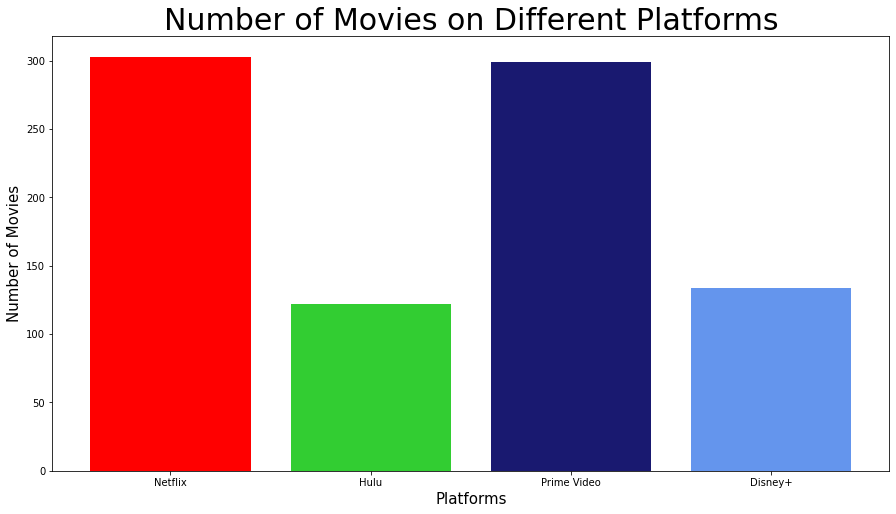

In [118]:
x = nameofplatform
y = numofmovie
plot_one_fig, plot_one_ax = plt.subplots(figsize = (15, 8))

plot_one_ax.bar(x,y)
plot_one_ax.set_title('Number of Movies on Different Platforms', fontsize=30)
plot_one_ax.set_xlabel('Platforms', fontsize=15)
plot_one_ax.set_ylabel('Number of Movies', fontsize=15)
x_pos = np.arange(len(nameofplatform))
plt.bar(x_pos, numofmovie, color=['red', 'limegreen', 'midnightblue', 'cornflowerblue'])

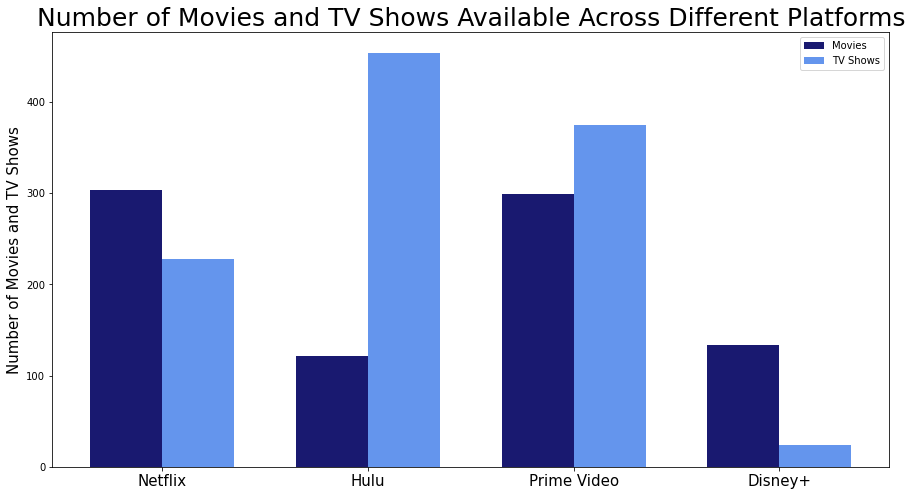

In [155]:
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
movies = [303, 122, 299, 134]
tvshows = [228, 454, 375, 24]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(x - width/2, movies, width, label='Movies', color= 'midnightblue')
ax.bar(x + width/2, tvshows, width, label='TV Shows', color= 'cornflowerblue')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Movies and TV Shows', fontsize=15)
ax.set_title('Number of Movies and TV Shows Available Across Different Platforms',fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
ax.legend()


plt.show()

In [56]:
nonstream_eg.describe() #not on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,4291.000000,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03
mean,50.186204,3.243548e+07,4.344763e+07,9.425513e+07,1.052673e+08
std,28.836660,4.005439e+07,6.501099e+07,1.661247e+08,2.017095e+08
min,1.000000,1.100000e+03,4.010000e+02,4.010000e+02,-1.574753e+08
25%,25.000000,6.000000e+06,4.000000e+06,7.833752e+06,1.243676e+06
50%,50.000000,1.940000e+07,2.096664e+07,3.346201e+07,3.250004e+07
75%,75.000000,4.100000e+07,5.507109e+07,1.044966e+08,1.200958e+08
max,100.000000,3.500000e+08,9.366622e+08,2.208208e+09,2.683973e+09


In [57]:
onstream_eg.describe() #on stream avg end gross

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,943.000000,9.430000e+02,9.430000e+02,9.430000e+02,9.430000e+02
mean,51.076352,4.130498e+07,5.904326e+07,1.303679e+08,1.481062e+08
std,28.907321,5.368128e+07,8.946631e+07,2.355588e+08,2.803931e+08
min,1.000000,3.000000e+04,3.880000e+02,7.030000e+02,-8.905748e+07
25%,26.000000,7.150000e+06,5.978240e+06,1.074536e+07,5.436333e+06
50%,51.000000,2.000000e+07,2.808716e+07,4.715865e+07,4.744992e+07
75%,76.500000,5.000000e+07,7.216403e+07,1.408390e+08,1.627550e+08
max,100.000000,4.250000e+08,7.605076e+08,2.776345e+09,3.111853e+09


In [58]:
eg_value = [148.1062, 105.2673]
eg_x = ['On Streaming Platforms', 'Not On Streaming Platforms']

<BarContainer object of 2 artists>

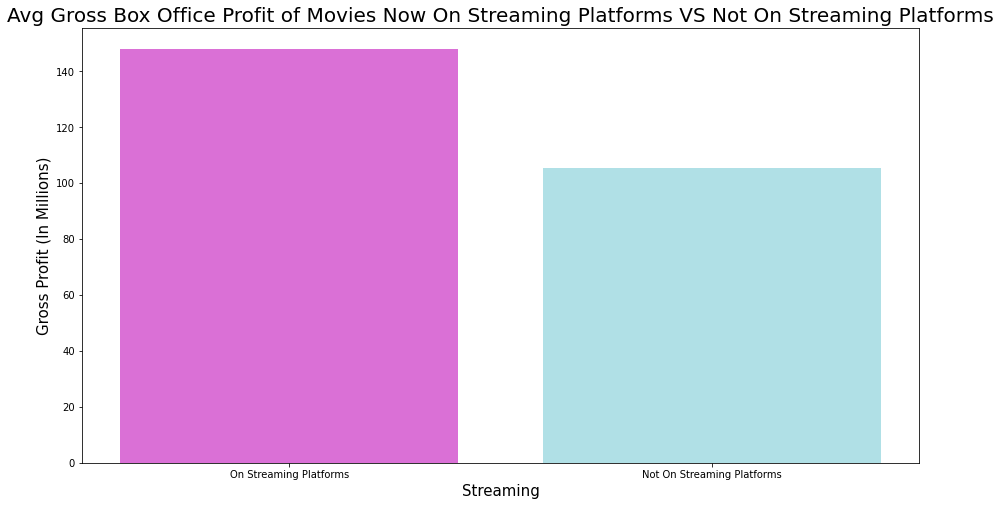

In [92]:
x = eg_x
y = eg_value
plot_one_fig, plot_one_ax = plt.subplots(figsize = (15, 8))

plot_one_ax.bar(x,y)
plot_one_ax.set_title('Avg Gross Box Office Profit of Movies Now On Streaming Platforms VS Not On Streaming Platforms', fontsize=20)
plot_one_ax.set_xlabel('Streaming', fontsize=15)
plot_one_ax.set_ylabel('Gross Profit (In Millions)', fontsize=15)
x_pos = np.arange(len(x))
plt.bar(x_pos, y, color=['orchid', 'powderblue'])

In [62]:
dfbudgetfilter[dfbudgetfilter.movie == 'The Signal']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross,Year
5718,19,"Feb 22, 2008",The Signal,50000.0,251150.0,406299.0,607449.0,2008
4525,26,"Jun 13, 2014",The Signal,4000000.0,600896.0,2665322.0,-733782.0,2014


In [63]:
dfnon = df[~df['movie'].isin(df_count_list)]
dfnon

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,end_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.667572e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,2.086125e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.681730e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09
...,...,...,...,...,...,...,...
607,8,"Sep 2, 2005",A Sound of Thunder,80000000.0,1900451.0,6.300451e+06,-7.179910e+07
352,53,"Apr 27, 2001",Town & Country,105000000.0,6712451.0,1.036477e+07,-8.792278e+07
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000.0,4411102.0,7.094995e+06,-8.849390e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.038000e+08


In [64]:
dfnon.describe()

,id,production_budget,domestic_gross,worldwide_gross,end_gross
count,4291.000000,4.291000e+03,4.291000e+03,4.291000e+03,4.291000e+03
mean,50.186204,3.243548e+07,4.344763e+07,9.425513e+07,1.052673e+08
std,28.836660,4.005439e+07,6.501099e+07,1.661247e+08,2.017095e+08
min,1.000000,1.100000e+03,4.010000e+02,4.010000e+02,-1.574753e+08
25%,25.000000,6.000000e+06,4.000000e+06,7.833752e+06,1.243676e+06
50%,50.000000,1.940000e+07,2.096664e+07,3.346201e+07,3.250004e+07
75%,75.000000,4.100000e+07,5.507109e+07,1.044966e+08,1.200958e+08
max,100.000000,3.500000e+08,9.366622e+08,2.208208e+09,2.683973e+09
